In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('autos.csv')
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [4]:
df.describe().round(2)

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.00,3.715280e+05,371528.00,371528.00,371528.00,371528.00,371528.0,371528.00
mean,185763.50,1.729514e+04,2004.58,115.55,125618.69,5.73,0.0,50820.67
std,107251.04,3.587954e+06,92.87,192.14,40112.34,3.71,0.0,25799.08
min,0.00,0.000000e+00,1000.00,0.00,5000.00,0.00,0.0,1067.00
25%,92881.75,1.150000e+03,1999.00,70.00,125000.00,3.00,0.0,30459.00
50%,185763.50,2.950000e+03,2003.00,105.00,150000.00,6.00,0.0,49610.00
75%,278645.25,7.200000e+03,2008.00,150.00,150000.00,9.00,0.0,71546.00
max,371527.00,2.147484e+09,9999.00,20000.00,150000.00,12.00,0.0,99998.00


In [5]:
df.describe(include= 'object')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [8]:
round((df.isna().mean()) * 100)

index                   0.0
dateCrawled             0.0
name                    0.0
seller                  0.0
offerType               0.0
price                   0.0
abtest                  0.0
vehicleType            10.0
yearOfRegistration      0.0
gearbox                 5.0
powerPS                 0.0
model                   6.0
kilometer               0.0
monthOfRegistration     0.0
fuelType                9.0
brand                   0.0
notRepairedDamage      19.0
dateCreated             0.0
nrOfPictures            0.0
postalCode              0.0
lastSeen                0.0
dtype: float64

In [9]:
df = df.dropna(subset= ['vehicleType', 'gearbox', 'model', 'fuelType'])
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,...,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371521,371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,...,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [10]:
df['notRepairedDamage'].fillna('Unknown', inplace=True)

C:\Users\konty\AppData\Local\Temp\ipykernel_46044\1311206622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['notRepairedDamage'].fillna('Unknown', inplace=True)


In [11]:
round((df.isna().mean()) * 100)

index                  0.0
dateCrawled            0.0
name                   0.0
seller                 0.0
offerType              0.0
price                  0.0
abtest                 0.0
vehicleType            0.0
yearOfRegistration     0.0
gearbox                0.0
powerPS                0.0
model                  0.0
kilometer              0.0
monthOfRegistration    0.0
fuelType               0.0
brand                  0.0
notRepairedDamage      0.0
dateCreated            0.0
nrOfPictures           0.0
postalCode             0.0
lastSeen               0.0
dtype: float64

In [12]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299864 entries, 2 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                299864 non-null  int64 
 1   dateCrawled          299864 non-null  object
 2   name                 299864 non-null  object
 3   seller               299864 non-null  object
 4   offerType            299864 non-null  object
 5   price                299864 non-null  int64 
 6   abtest               299864 non-null  object
 7   vehicleType          299864 non-null  object
 8   yearOfRegistration   299864 non-null  int64 
 9   gearbox              299864 non-null  object
 10  powerPS              299864 non-null  int64 
 11  model                299864 non-null  object
 12  kilometer            299864 non-null  int64 
 13  monthOfRegistration  299864 non-null  int64 
 14  fuelType             299864 non-null  object
 15  brand                299864 non-null  o

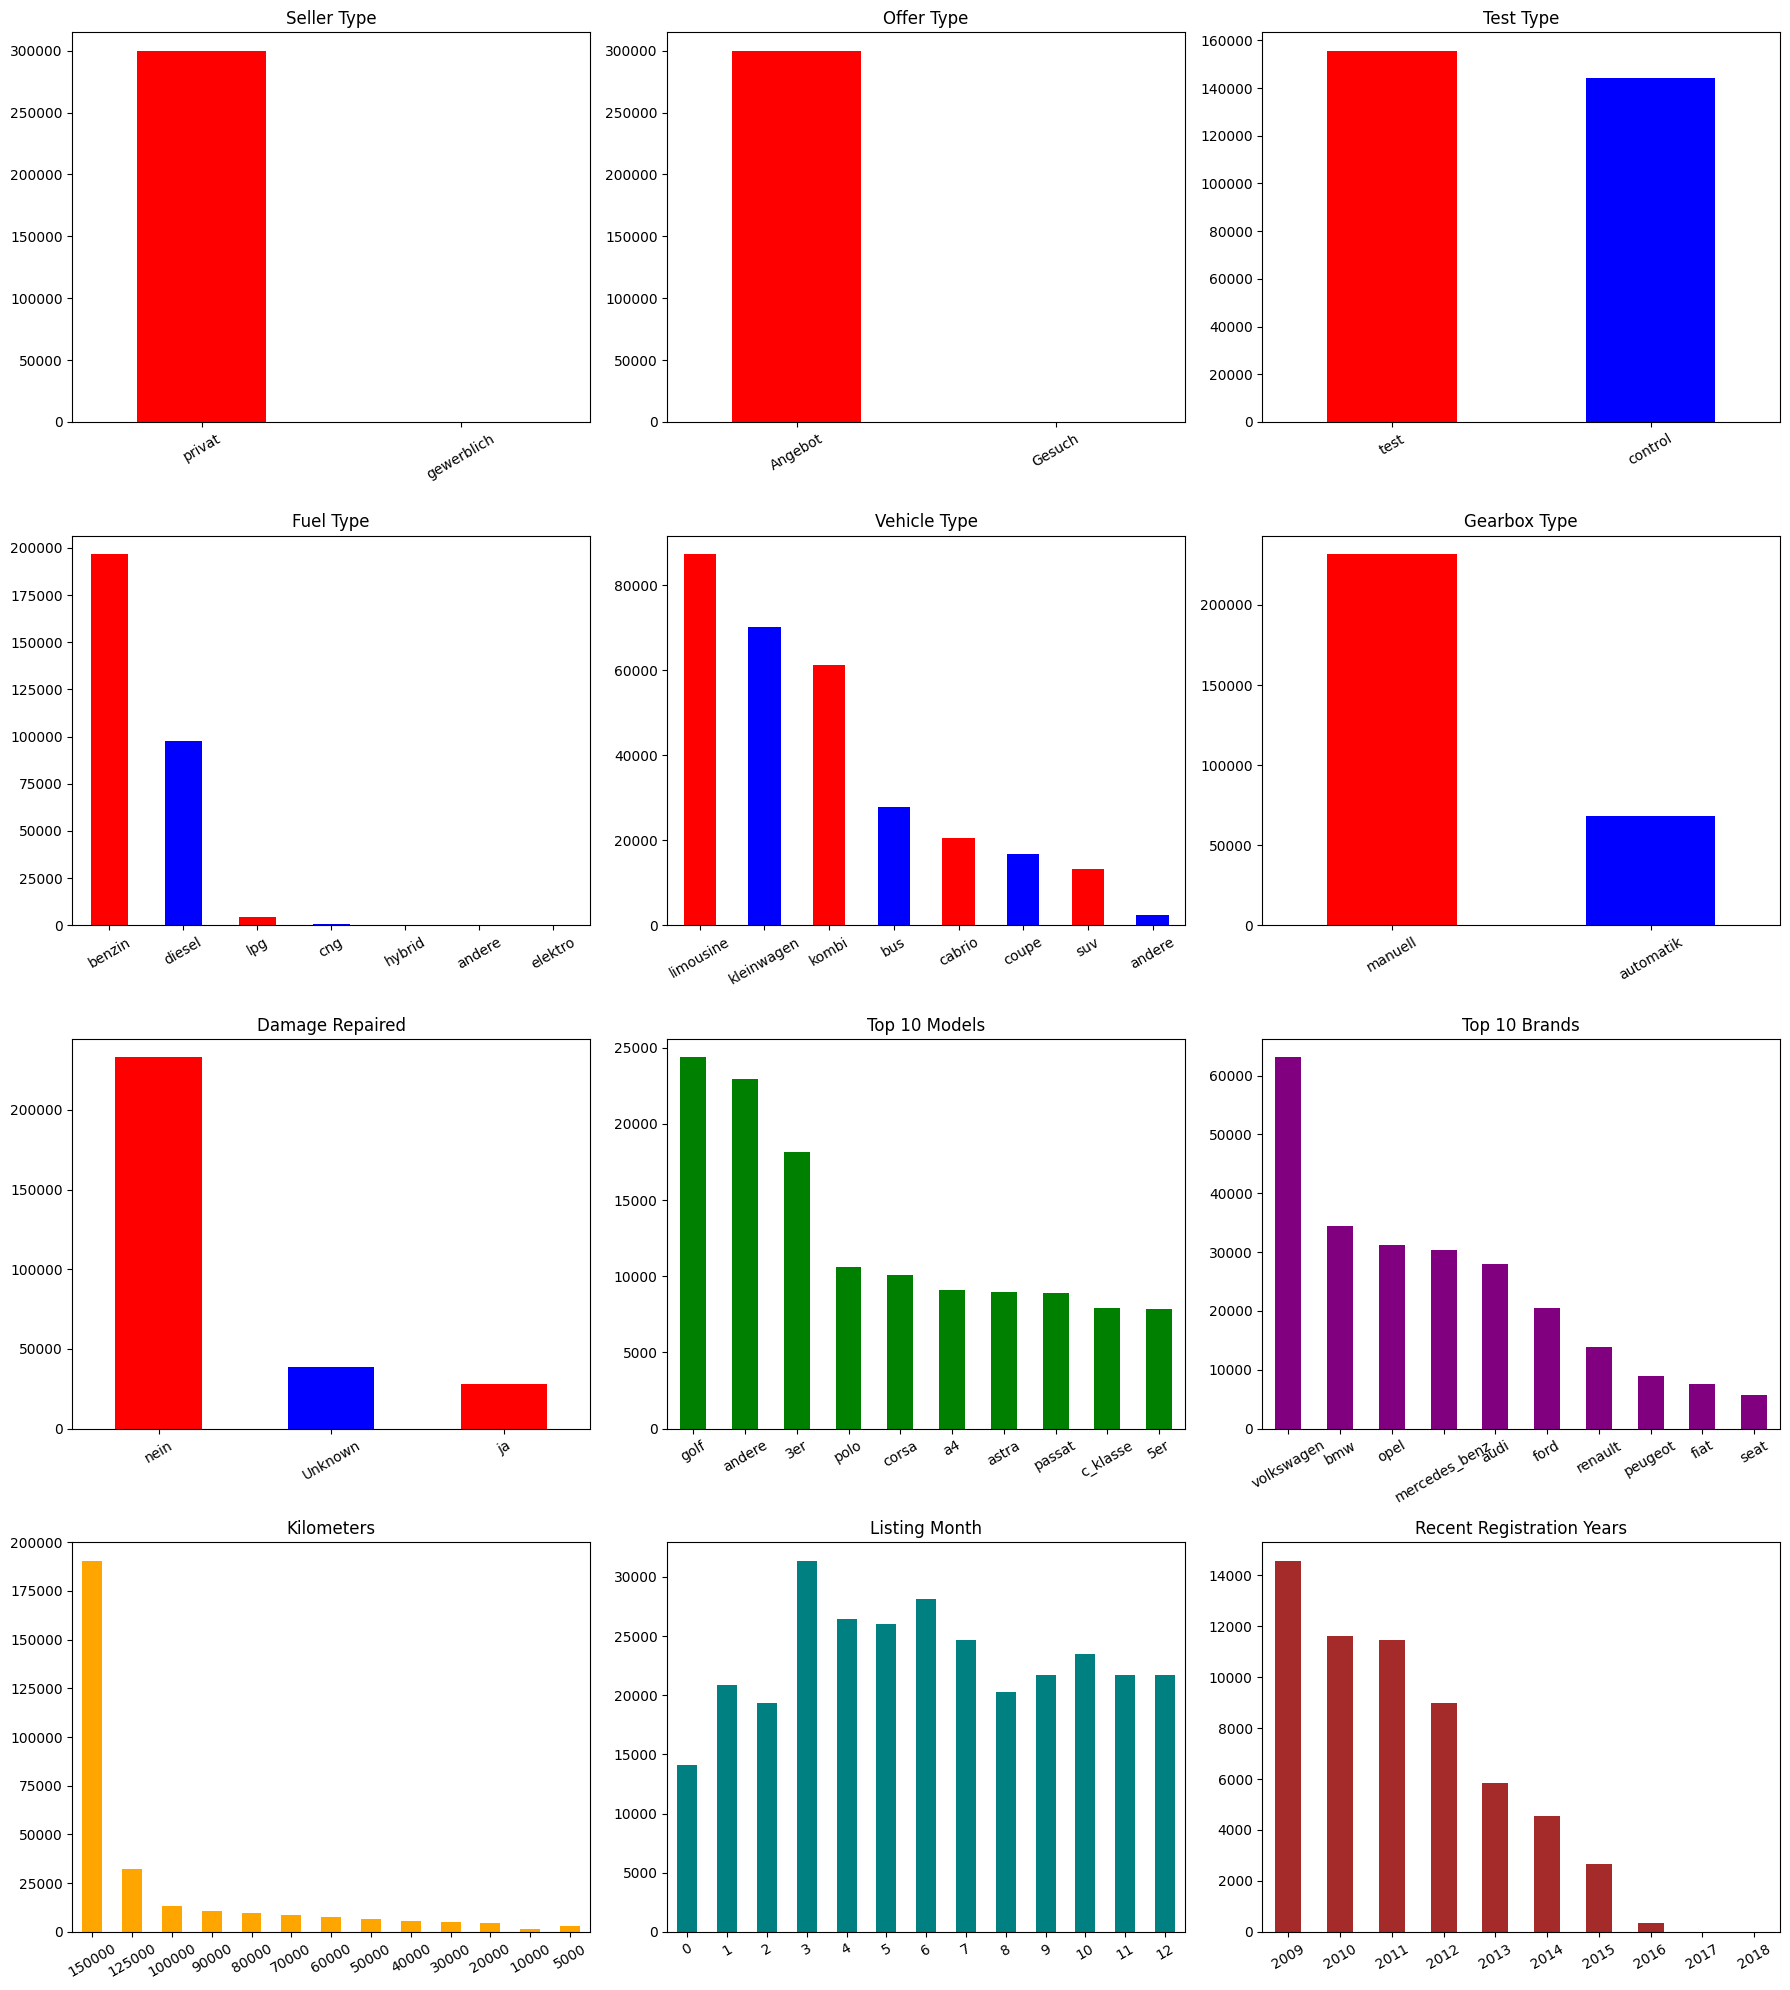

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

# Row 1
df['seller'].value_counts().plot(kind='bar', title='Seller Type', color=['red', 'blue'], ax=axes[0, 0], rot=30, xlabel='')
df['offerType'].value_counts().plot(kind='bar', title='Offer Type', color=['red', 'blue'], ax=axes[0, 1], rot=30, xlabel='')
df['abtest'].value_counts().plot(kind='bar', title='Test Type', color=['red', 'blue'], ax=axes[0, 2], rot=30, xlabel='')

# Row 2
df['fuelType'].value_counts().plot(kind='bar', title='Fuel Type', color=['red', 'blue'], ax=axes[1, 0], rot=30, xlabel='')
df['vehicleType'].value_counts().plot(kind='bar', title='Vehicle Type', color=['red', 'blue'], ax=axes[1, 1], rot=30, xlabel='')
df['gearbox'].value_counts().plot(kind='bar', title='Gearbox Type', color=['red', 'blue'], ax=axes[1, 2], rot=30, xlabel='')

# Row 3
df['notRepairedDamage'].value_counts().plot(kind='bar', title='Damage Repaired', color=['red', 'blue'], ax=axes[2, 0], rot=30, xlabel='')
df['model'].value_counts().head(10).plot(kind='bar', title='Top 10 Models', color='green', ax=axes[2, 1], rot=30, xlabel='')
df['brand'].value_counts().head(10).plot(kind='bar', title='Top 10 Brands', color='purple', ax=axes[2, 2], rot=30, xlabel='')

# Row 4
df['kilometer'].value_counts().sort_index(ascending=False).plot(kind='bar', title='Kilometers', color='orange', ax=axes[3, 0], rot=30, xlabel='')
df['monthOfRegistration'].value_counts().sort_index().plot(kind='bar', title='Listing Month', color='teal', ax=axes[3, 1], rot=30, xlabel='')
df['yearOfRegistration'].value_counts().sort_index().tail(10).plot(kind='bar', title='Recent Registration Years', color='brown', ax=axes[3, 2], rot=30, xlabel='')

plt.tight_layout()
plt.show()


In [15]:
df.drop(['index', 'nrOfPictures', 'seller', 'offerType', 'dateCrawled'], axis=1, inplace=True)

In [16]:
df = df[df['fuelType'].isin(['benzin', 'diesel'])]

In [17]:
df.fuelType.value_counts()

fuelType
benzin    196714
diesel     97610
Name: count, dtype: int64

In [18]:
df.yearOfRegistration.value_counts()

yearOfRegistration
1999    19263
2006    18129
2005    17635
2003    17584
2004    17544
        ...  
1949        1
1919        1
1948        1
1928        1
1947        1
Name: count, Length: 92, dtype: int64

In [19]:
df = df[df['yearOfRegistration'].between(1980, 2023)]

In [20]:
df.monthOfRegistration.value_counts()

monthOfRegistration
3     30545
6     27355
4     25792
5     25389
7     23743
10    22962
9     21230
11    21228
12    21176
1     20245
8     19776
2     18899
0     13623
Name: count, dtype: int64

In [21]:
df = df[df['monthOfRegistration'] != 0]

In [22]:
# German to English
df['gearbox'] = df['gearbox'].apply(lambda g: 'Manual' if g == 'manuell' else 'Automatic')
df['notRepairedDamage'] = df['notRepairedDamage'].apply(lambda g: 'Yes' if g == 'ja' else 'No' if g =='nein' else 'NaN')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278340 entries, 2 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 278340 non-null  object
 1   price                278340 non-null  int64 
 2   abtest               278340 non-null  object
 3   vehicleType          278340 non-null  object
 4   yearOfRegistration   278340 non-null  int64 
 5   gearbox              278340 non-null  object
 6   powerPS              278340 non-null  int64 
 7   model                278340 non-null  object
 8   kilometer            278340 non-null  int64 
 9   monthOfRegistration  278340 non-null  int64 
 10  fuelType             278340 non-null  object
 11  brand                278340 non-null  object
 12  notRepairedDamage    278340 non-null  object
 13  dateCreated          278340 non-null  object
 14  postalCode           278340 non-null  int64 
 15  lastSeen             278340 non-null  o

In [24]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [25]:
df.shape

(278340, 16)

In [26]:
df['price'].describe()

count    2.783400e+05
mean     8.256588e+03
std      3.855265e+05
min      0.000000e+00
25%      1.499000e+03
50%      3.600000e+03
75%      8.300000e+03
max      1.000000e+08
Name: price, dtype: float64

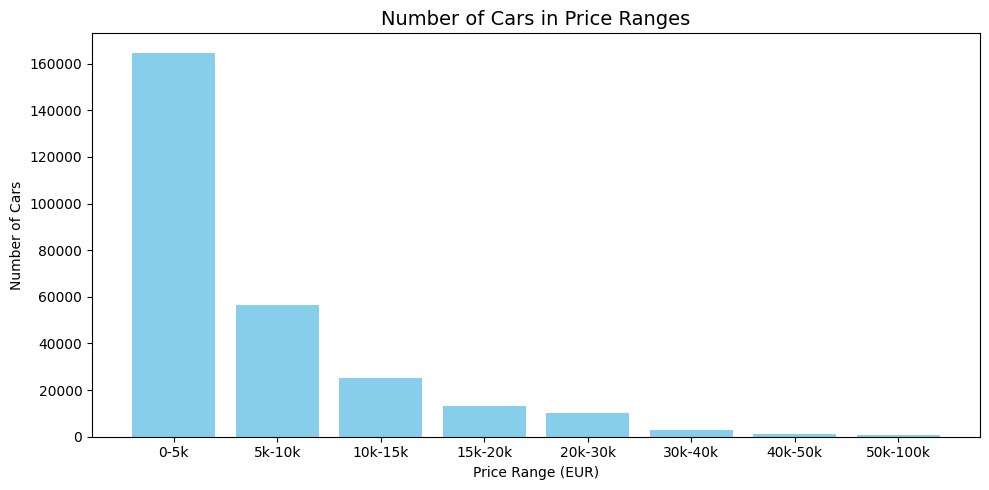

In [27]:
# Create price bins (e.g., 0-5k, 5k-10k, etc.)
bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 100000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-100k']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

# Plot
price_range_counts = df['price_range'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(price_range_counts.index.astype(str), price_range_counts.values, color='skyblue')
plt.title('Number of Cars in Price Ranges', fontsize=14)
plt.xlabel('Price Range (EUR)')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()


In [28]:
df = df[(df['price'] >= 100) & (df['price'] <= 150000)]
df = df[(df['powerPS'] < 1000) & (df['kilometer'] > 0)]

In [29]:
df  = df[df['powerPS'] > 0]

In [30]:
df['car_age'] = 2025 - df['yearOfRegistration']

In [31]:
df[['yearOfRegistration', 'car_age']].head()


,yearOfRegistration,car_age
2,2004,21
3,2001,24
4,2008,17
5,1995,30
6,2004,21


In [32]:
bins = [0, 5, 10, 15, 20, 25, 30, 40, 100]
labels = ['0-5 yrs', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40', '40+']
df['car_age_group'] = pd.cut(df['car_age'], bins=bins, labels=labels)

df['car_age_group'].value_counts().sort_index()

car_age_group
0-5 yrs        0
6-10        2867
11-15      40979
16-20      76366
21-25      76507
26-30      50467
31-40      13322
40+         1116
Name: count, dtype: int64

<Axes: title={'center': 'Car Age Groups'}, xlabel='car_age_group'>

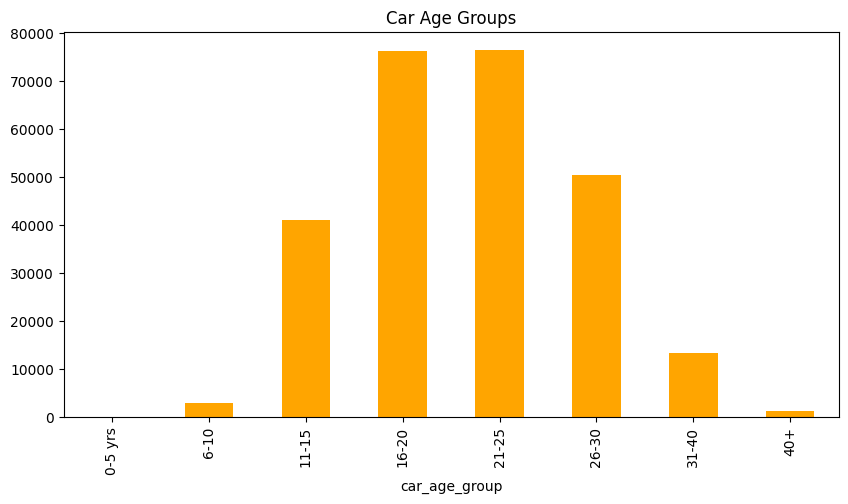

In [33]:
df['car_age_group'].value_counts().sort_index().plot(kind='bar', color='orange', figsize=(10, 5), title='Car Age Groups')


In [34]:
categorical_cols = ['vehicleType', 'gearbox', 'model', 'brand', 'fuelType', 'notRepairedDamage', 'car_age_group', 'abtest', 'price_range']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261624 entries, 2 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 261624 non-null  object        
 1   price                261624 non-null  int64         
 2   abtest               261624 non-null  int32         
 3   vehicleType          261624 non-null  int32         
 4   yearOfRegistration   261624 non-null  int64         
 5   gearbox              261624 non-null  int32         
 6   powerPS              261624 non-null  int64         
 7   model                261624 non-null  int32         
 8   kilometer            261624 non-null  int64         
 9   monthOfRegistration  261624 non-null  int64         
 10  fuelType             261624 non-null  int32         
 11  brand                261624 non-null  int32         
 12  notRepairedDamage    261624 non-null  int32         
 13  dateCreated        

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['price', 'powerPS', 'kilometer', 'car_age']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [38]:
df.shape

(261624, 19)

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Streamlit

In [40]:
df.to_csv('cleaned_df.csv')

In [50]:
%%writefile used_cars_app.py

import streamlit as st
import pandas as pd
import plotly.express as px
import zipfile

st.markdown("<h1 style='text-align: center; color: cyan;'>🚗 Used Cars Explorer</h1>", unsafe_allow_html=True)
st.markdown("<h4 style='text-align: center;'>Analyze, Filter & Visualize cleaned dataset easily</h4>", unsafe_allow_html=True)
st.markdown("---")

@st.cache_data
def load_data():
    with zipfile.ZipFile('cleaned_df.zip') as z:
        with z.open('cleaned_df.csv') as f:
            df = pd.read_csv(f, index_col=0)
            df['car_age'] = 2025 - df['yearOfRegistration']
            return df

df = load_data()

# --- Sidebar filters ---
st.sidebar.header("🔧 Filter Options")

brands = sorted(df['brand'].dropna().unique())
selected_brand = st.sidebar.selectbox("Select Brand", options=["All"] + brands)
if selected_brand != "All":
    df = df[df['brand'] == selected_brand]

fuel_types = sorted(df['fuelType'].dropna().unique())
selected_fuel = st.sidebar.multiselect("Select Fuel Type(s)", fuel_types, default=fuel_types)
df = df[df['fuelType'].isin(selected_fuel)]

age_range = st.sidebar.slider("Select Car Age", min_value=int(df['car_age'].min()), max_value=int(df['car_age'].max()), value=(0, 30))
df = df[df['car_age'].between(age_range[0], age_range[1])]

st.subheader("🔍 Preview of Filtered Data")
st.dataframe(df.head(10))

st.subheader("📊 Summary Statistics")
st.write(df.describe().T)

st.subheader("📈 Price Distribution")
fig_price = px.histogram(df, x='price', nbins=50, color_discrete_sequence=['#00BFC4'])
st.plotly_chart(fig_price)

st.subheader("🚘 Price by Vehicle Type")
fig_box = px.box(df, x='vehicleType', y='price', color='vehicleType', title="Boxplot by Vehicle Type")
st.plotly_chart(fig_box)

df_scatter = df.dropna(subset=['car_age', 'price', 'gearbox', 'powerPS'])

df_scatter = df.dropna(subset=['car_age', 'price', 'gearbox', 'powerPS'])

st.subheader("🏷️ Most Common Car Models")
model_counts = df['model'].value_counts().head(10)
st.bar_chart(model_counts)

st.subheader("⛽ Fuel Type Distribution")
fuel_counts = df['fuelType'].value_counts()
fig_fuel = px.pie(values=fuel_counts.values, names=fuel_counts.index, title="Fuel Type Share")
st.plotly_chart(fig_fuel)

# Remove rows with non-positive or unrealistic powerPS
df_scatter = df_scatter[df_scatter['powerPS'] > 0]

st.subheader("📉 Price vs. Car Age")
fig_scatter = px.scatter(
    df_scatter,
    x='car_age',
    y='price',
    color='gearbox',
    size='powerPS',
    title="Price vs. Car Age (colored by gearbox, sized by powerPS)",
    opacity=0.6
)
st.plotly_chart(fig_scatter)


st.markdown("---")
st.caption("Made by Abdalla Gamal | Streamlit App for Cleaned Used Cars Dataset 🚗")


Overwriting used_cars_app.py


In [49]:
! streamlit run used_cars_app.py

^C
